Plot equivalent ORFs:
- EAIS + WEDD + AMUN + ROSS + PENS
- TOTL
- 2  * HALF
- .5 * DOUB

In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys

sys.path.append('../src')
import utils as ut

In [2]:
ds = xr.open_dataset('../data/dummy.nc')

In [3]:
mpl.rcParams['lines.linewidth'] = 2.
mpl.rcParams['figure.subplot.wspace'] = .1
mpl.rcParams['figure.subplot.left'] = .15
mpl.rcParams['figure.subplot.right'] = .99
mpl.rcParams['figure.subplot.bottom'] = .1
mpl.rcParams['figure.subplot.top'] = .95
mpl.rcParams['figure.figsize'] = (7,4)

basinname = ['East Ant.','Ross','Amundsen','Weddell','Peninsula']

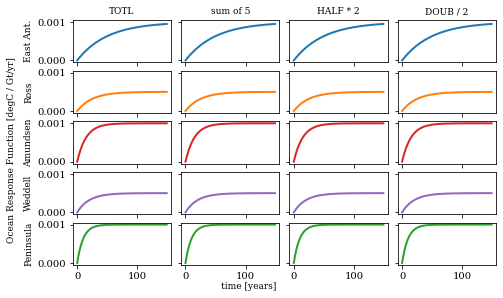

In [4]:
fig,ax = plt.subplots(5,4,sharex=True,sharey=True)
for b,bas in enumerate(ds.basin.values):
    ax[b,0].plot(ds.rftime,ds.orf[:,5,b],c=ut.bcol[bas])
    ax[b,1].plot(ds.rftime,np.sum(ds.orf[:,:5,b],axis=1),c=ut.bcol[bas])
    ax[b,2].plot(ds.rftime,2*ds.orf[:,6,b],c=ut.bcol[bas])
    ax[b,3].plot(ds.rftime,.5*ds.orf[:,7,b],c=ut.bcol[bas])

    ax[b,0].set_ylabel(basinname[b])
ax[0,0].set_title('TOTL')
ax[0,1].set_title('sum of 5')
ax[0,2].set_title('HALF * 2')
ax[0,3].set_title('DOUB / 2')
fig.supxlabel('time [years]',fontsize=9)
fig.supylabel('Ocean Response Function [degC / Gt/yr]',fontsize=9)

plt.savefig(f'../draftfigs/linearitycheck.png',dpi=450)
plt.show()